<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg6/K_Means_Clustering_menggunakan_dataset_lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#Nama : Andhika Aria Pratama Nugraha
#NIM  : 1103202121
#Tugas Minggu 6
# Impor library yang diperlukan
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/drive/My Drive/Dataset/Amazon Business Research Analyst Dataset.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,object
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,object
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,object
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,object


In [90]:
# Mengecek nilai NaN dalam seluruh dataframe
df_nan = df.isna().sum()
print("Dataframe dengan nilai NaN:")
print(df_nan)
df.info()

Dataframe dengan nilai NaN:
ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather                        158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
Name:                            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           

In [91]:
# Mengisi nilai null dengan rata-rata (mean) pada type data numerical
mean_age = df['Delivery_person_Age'].mean()
mean_ratings = df['Delivery_person_Ratings'].mean()
mean_deliveries = df['multiple_deliveries'].mean()

df['Delivery_person_Age'].fillna(mean_age, inplace=True)
df['Delivery_person_Ratings'].fillna(mean_ratings, inplace=True)
df['multiple_deliveries'].fillna(mean_deliveries, inplace=True)


# Mengisi nilai null dengan modus (nilai yang paling sering muncul) pada type data object
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

df_nan = df.isna().sum()
df_nan

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather                        0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Name:                          0
dtype: int64

In [92]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,29.517235,4.632786,11.003669,76.976494,11.043669,77.016494,30-03-2022,18:20,15:05,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.000000,4.600000,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.000000,4.500000,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.000000,4.800000,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.000000,4.600000,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.000000,4.600000,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,object
11395,0x443b,JAPRES11DEL01,33.000000,4.900000,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,object
11396,0x1ea5,SURRES11DEL03,29.517235,4.632786,21.157735,72.768778,21.217735,72.828778,11-03-2022,18:20,21:05,Sunny,Low,3,Drinks,scooter,1.0,No,Metropolitian,object
11397,0x22d4,VADRES03DEL02,27.000000,4.700000,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,object


In [93]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Name:'],
      dtype='object')

In [94]:
# Menghapus kolom "ID" dan "Name" dari dataframe
df = df.drop(columns=["ID",'Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked','Weather','Road_traffic_density','Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Name:','Restaurant_latitude','Delivery_location_latitude'])
df.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_longitude,Delivery_location_longitude
0,29.517235,4.632786,76.976494,77.016494
1,28.000000,4.600000,77.696664,77.806664
2,23.000000,4.500000,75.789034,75.879034
3,21.000000,4.800000,75.837333,75.927333
4,31.000000,4.600000,80.218114,80.328114


In [95]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_longitude', 'Delivery_location_longitude'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

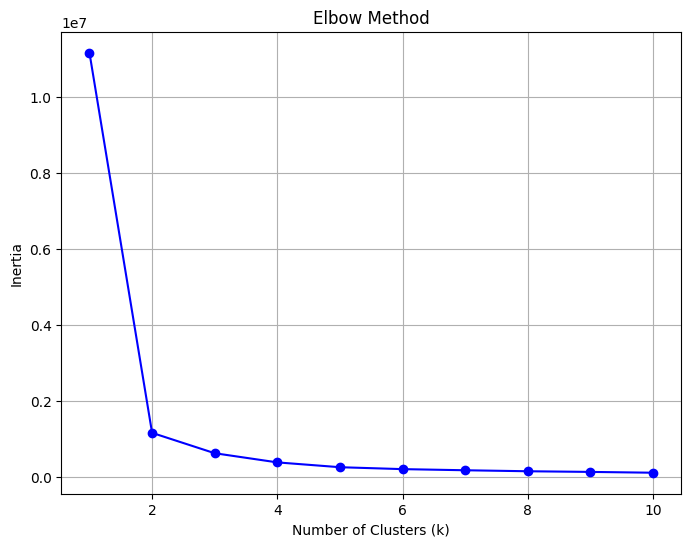

In [96]:
# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_longitude', 'Delivery_location_longitude']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


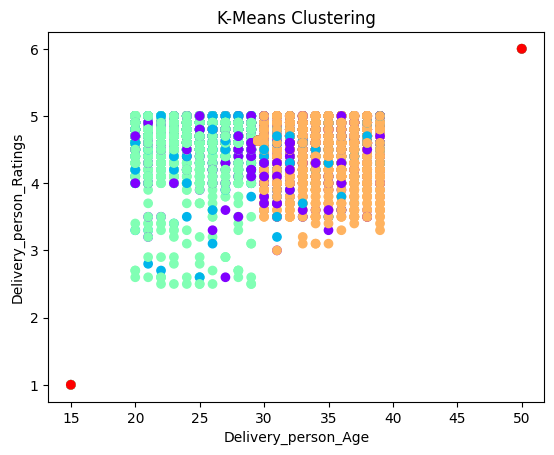

In [97]:
# Pilih atribut untuk K-Means Clustering
attributes = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_longitude', 'Delivery_location_longitude']]

# Tentukan jumlah cluster (K) yang diinginkan
k = 5  # Anda dapat mengganti jumlah cluster sesuai dengan kebutuhan

# Membuat model K-Means dengan jumlah cluster K
kmeans = KMeans(n_clusters=k)

# Melakukan clustering pada atribut yang telah dipilih
df['Cluster'] = kmeans.fit_predict(attributes)

# Visualisasi hasil clustering (jika diperlukan)
plt.scatter(attributes['Delivery_person_Age'], attributes['Delivery_person_Ratings'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery_person_Ratings')
plt.title('K-Means Clustering')
plt.show()


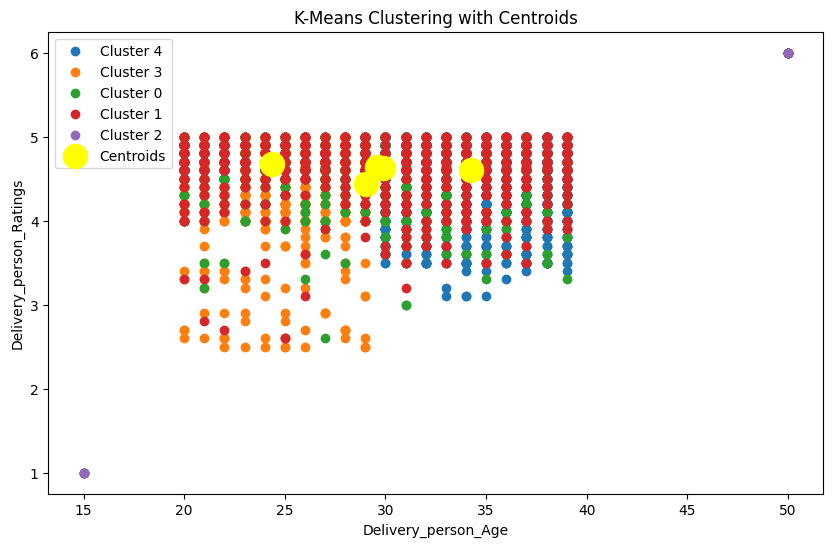

In [98]:
# Pilih atribut untuk K-Means Clustering
attributes = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_longitude', 'Delivery_location_longitude']]

# Tentukan jumlah cluster (K) yang diinginkan
k = 5

# Membuat model K-Means dengan jumlah cluster K
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)

# Melakukan clustering pada atribut yang telah dipilih
df['label'] = kmeans.fit_predict(attributes)

# Visualisasi hasil clustering dengan keterangan dan centroid
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Delivery_person_Age'], df[df['label'] == label]['Delivery_person_Ratings'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery_person_Ratings')
plt.legend()
plt.show()


In [99]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.9120
Silhouette Score for k=3: 0.9165
Silhouette Score for k=4: 0.4295
Silhouette Score for k=5: 0.4667
Silhouette Score for k=6: 0.4080
Silhouette Score for k=7: 0.4147
Silhouette Score for k=8: 0.4262
Silhouette Score for k=9: 0.3972
Silhouette Score for k=10: 0.4080


In [100]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.1784
Davies-Bouldin Index for k=3: 0.1028
Davies-Bouldin Index for k=4: 0.5614
Davies-Bouldin Index for k=5: 0.5265
Davies-Bouldin Index for k=6: 0.6379
Davies-Bouldin Index for k=7: 0.6274
Davies-Bouldin Index for k=8: 0.6527
Davies-Bouldin Index for k=9: 0.6609
Davies-Bouldin Index for k=10: 0.6936
